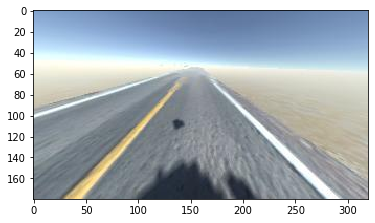

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# So we don't have to use cv2.cvtColor everytime
def showImage(image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
# So we can show titled images too
def showTitledImage(title, image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
image = cv2.imread('data/tub_25/453_cam-image_array_.jpg')
showImage(image)

In [2]:
# Define the region of the image we're interested in transforming
regionOfInterest = np.float32(
                [[0,  180],  # Bottom left
                [112.5, 87.5], # Top left
                [200, 87.5], # Top right
                [307.5, 180]]) # Bottom right
                
# Define the destination coordinates for the perspective transform
newPerspective = np.float32(
            [[80,  180],  # Bottom left
            [80,    0.25],  # Top left
            [230,   0.25],  # Top right
            [230, 180]]) # Bottom right

In [3]:
# Function that draws coordinates on an image, connecting them by lines
def drawLinesFromCoordinates(coordinates):
    # Pair first point with second, second with third, etc.
    points = zip(coordinates, np.roll(coordinates, -1, axis=0))
    # Connect point1 with point2: plt.plot([x1, x2], [y1, y2])
    for point1, point2 in points:
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], linewidth=5)

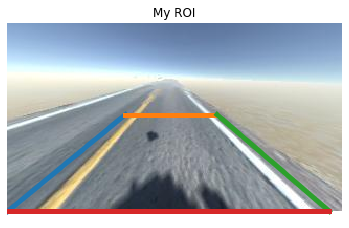

In [4]:
# Draw the image to visualize the selected region of interest
showTitledImage("My ROI", image)
drawLinesFromCoordinates(regionOfInterest)

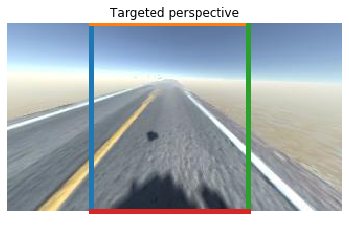

In [5]:
# Draw the image to visualize the targeted perspective
showTitledImage("Targeted perspective", image)
drawLinesFromCoordinates(newPerspective)

In [6]:
# Compute the matrix that transforms the perspective
transformMatrix = cv2.getPerspectiveTransform(regionOfInterest, newPerspective)
# Compute the inverse matrix for reversing the perspective transform
inverseTransformMatrix = cv2.getPerspectiveTransform(newPerspective, regionOfInterest)

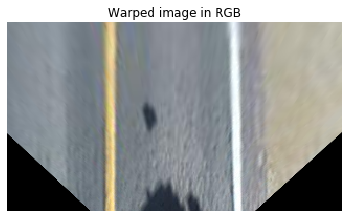

In [7]:
# Warp the perspective
# image.shape[:2] takes the height, width, 
# [::-1] inverses it to width, height
warpedImage = cv2.warpPerspective(image, transformMatrix, image.shape[:2][::-1], flags=cv2.INTER_LINEAR) 
# Show the warped image
showTitledImage("Warped image in RGB", warpedImage)

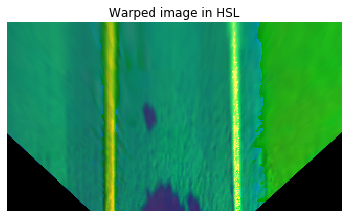

In [8]:
hslImage = cv2.cvtColor(warpedImage, cv2.COLOR_BGR2HLS)
showTitledImage("Warped image in HSL", hslImage)

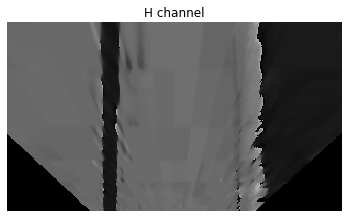

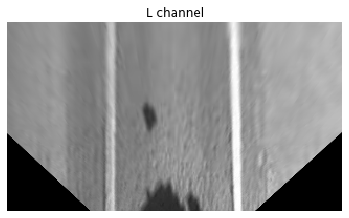

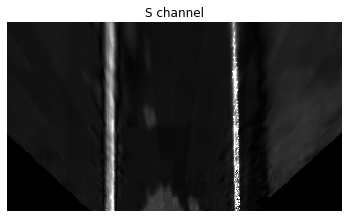

In [13]:
# Split the image into three variables by the channels
hChannel, lChannel, sChannel = cv2.split(hslImage)
showTitledImage("H channel", hChannel)
showTitledImage("L channel", lChannel)
showTitledImage("S channel", sChannel)

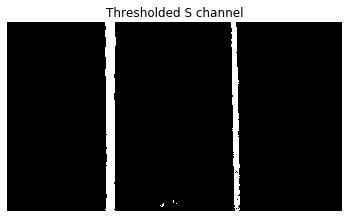

In [14]:
# Threshold the S channel image to select only the lines
lowerThreshold = 65
higherThreshold = 255

# Threshold the image, keeping only the pixels/values that are between lower and higher threshold
returnValue, binaryThresholdedImage = cv2.threshold(sChannel,lowerThreshold,higherThreshold,cv2.THRESH_BINARY)

# Since this is a binary image, we'll convert it to a 3-channel image so OpenCV can use it
# Doesn't really matter if we use RGB/BGR/anything else
thresholdedImage = cv2.cvtColor(binaryThresholdedImage, cv2.COLOR_GRAY2RGB)
showTitledImage("Thresholded S channel", thresholdedImage)

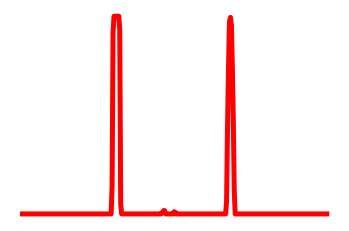

In [34]:
# Sum the pixels on the x axis
# This will sum all pixel values for a given x axis (column)
histogram = np.sum(binaryThresholdedImage, axis=0)
plt.axis('off')
plt.plot(histogram, color='red', linewidth=5)


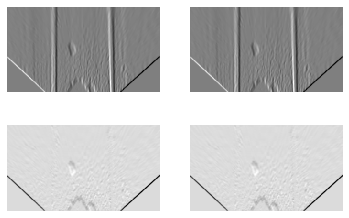

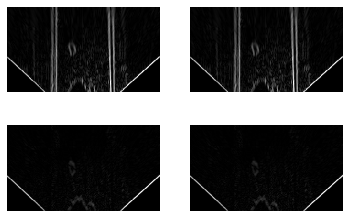

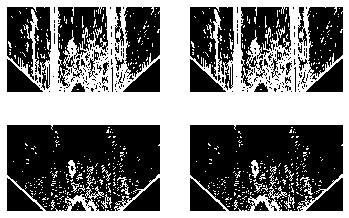

In [103]:
def showSobelImages(images):
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(images[0], cmap='gray')
    axarr[0,0].axis('off')
    axarr[0,1].imshow(images[1], cmap='gray')
    axarr[0,1].axis('off')
    axarr[1,0].imshow(images[2], cmap='gray')
    axarr[1,0].axis('off')
    axarr[1,1].imshow(images[3], cmap='gray')
    axarr[1,1].axis('off')


grayWarpedImage = cv2.cvtColor(warpedImage, cv2.COLOR_BGR2GRAY)
plt.imsave('graywarped.jpg', grayWarpedImage, cmap='gray')
plt.imsave('schannel.jpg', sChannel, cmap='gray')
# Taking the derivative on the X-axis
xAxisSobelWarped = cv2.Sobel(grayWarpedImage, cv2.CV_64F, 1, 0, ksize=5)
xAxisSobelSChannel = cv2.Sobel(grayWarpedImage, cv2.CV_64F, 1, 0, ksize=5)

# Taking the derivative on the Y-axis
yAxisSobelWarped = cv2.Sobel(grayWarpedImage, cv2.CV_64F, 0, 1, ksize=5)
yAxisSobelSChannel = cv2.Sobel(grayWarpedImage, cv2.CV_64F, 0, 1, ksize=5)

images = [xAxisSobelWarped, xAxisSobelSChannel, yAxisSobelWarped, yAxisSobelSChannel]
showSobelImages(images)

# Absolute values
showSobelImages([np.absolute(x) for x in images])

lowerThreshold = 200
higherThreshold = 255
thresholdedImages = []
for image in images:
    returnValue, image = cv2.threshold(np.absolute(image), lowerThreshold,higherThreshold, cv2.THRESH_BINARY)
    thresholdedImages += [image]
showSobelImages(thresholdedImages)

In [ ]:
# Absolute Sobel
showSobelImage(np.absolute(xAxisSobelWarped))
showSobelImage(np.absolute(xAxisSobelSChannel))
showSobelImage(np.absolute(yAxisSobelWarped))
showSobelImage(np.absolute(yAxisSobelSChannel))